# Your First Map

Get started with plotting in GeoPandas.

## Introduction

In this micro-course, you'll learn about different methods to wrangle and visualize geospatial data, or data with a geographic location.

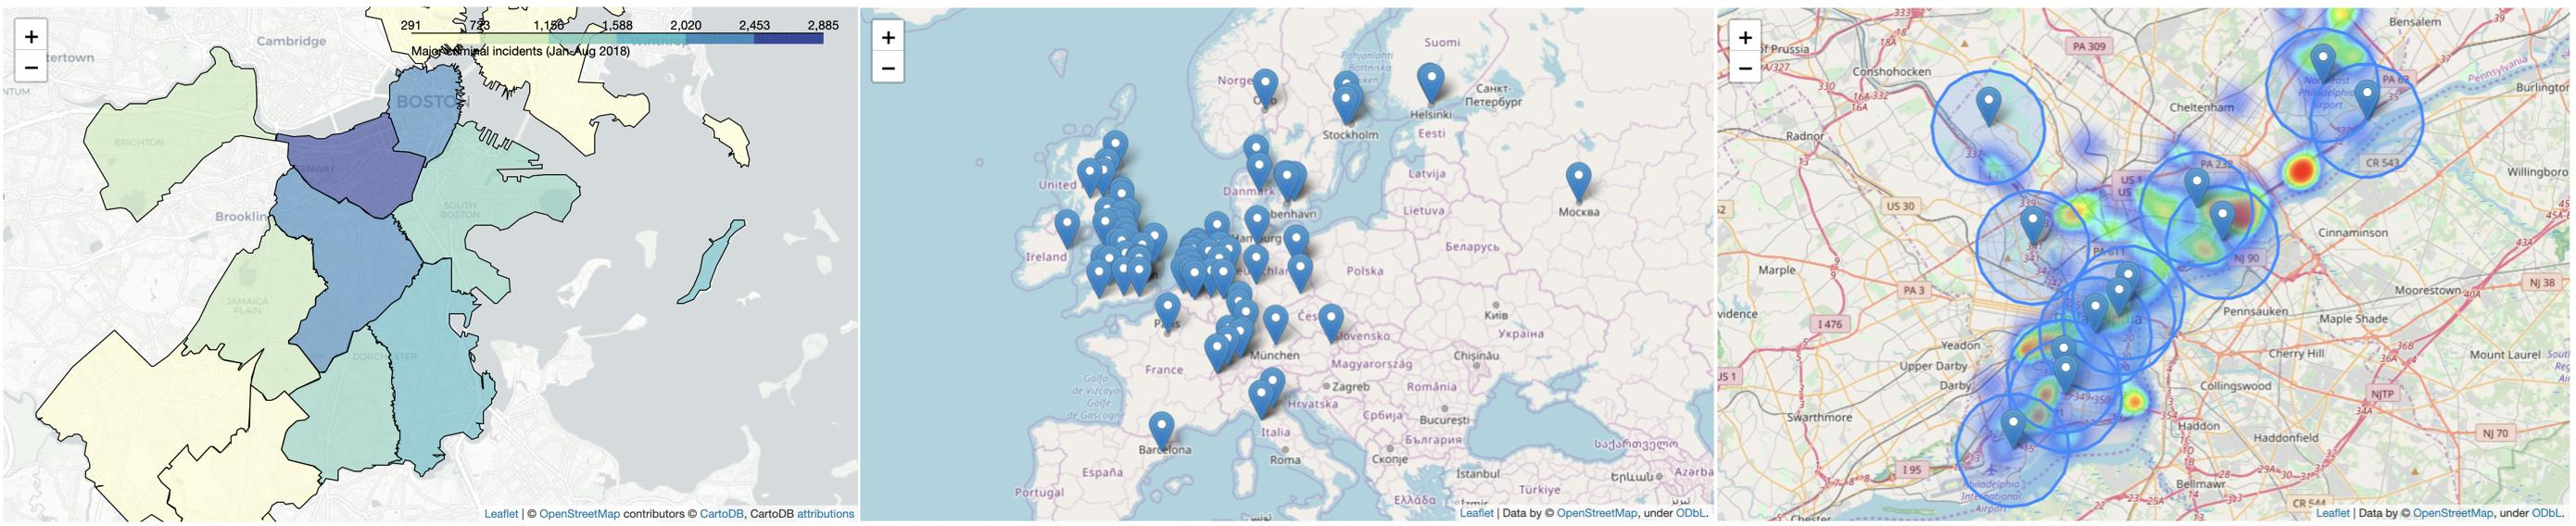

Along the way, you'll offer solutions to several real-world problems like:

- Where should a global non-profit expand its reach in remote areas of the Philippines?
- How do purple martins, a threatened bird species, travel between North and South America? Are the birds travelling to conservation areas?
- Which areas of Japan could potentially benefit from extra earthquake reinforcement?
- Which Starbucks stores in California are strong candidates for the next Starbucks Reserve Roastery location?
- Does New York City have sufficient hospitals to respond to motor vehicle collisions? Which areas of the city have gaps in coverage?

You'll also visualize crime in the city of Boston, examine health facilities in Ghana, explore top universities in Europe, and track releases of toxic chemicals in the United States.

In this first tutorial, we'll quickly cover the pre-requisites that you'll need to complete this micro-course. And, if you'd like to review more deeply, we recommend the Pandas micro-course.

We'll also get started with visualizing our first geospatial dataset!

## Reading data

The first step is to read in some geospatial data! To do this, we'll use the GeoPandas library.

In [1]:
import geopandas as gpd

There are many, many different geospatial file formats, such as shapefile, GeoJSON, KML, and GPKG. We won't discuss their differences in this micro-course, but it's important to mention that:

- shapefile is the most common file type that you'll encounter, and
- all of these file types can be quickly loaded with the gpd.read_file() function.

The next code cell loads a shapefile containing information about forests, wilderness areas, and other lands under the care of the Department of Environmental Conservation in the state of New York.

In [2]:
# Read in the data
full_data = gpd.read_file("dataset/DEC_lands/DEC_lands/DEC_lands.shp")

# View the first five rows of the data
full_data.head()

OBJECTID          CATEGORY UNIT                          FACILITY  \
0         1  FOR PRES DET PAR  CFP        HANCOCK FP DETACHED PARCEL   
1         2  FOR PRES DET PAR  CFP        HANCOCK FP DETACHED PARCEL   
2         3  FOR PRES DET PAR  CFP        HANCOCK FP DETACHED PARCEL   
3         4  FOR PRES DET PAR  CFP  GREENE COUNTY FP DETACHED PARCEL   
4         6   FOREST PRESERVE  AFP         SARANAC LAKES WILD FOREST   

         CLASS            UMP                       DESCRIPTIO  REGION  \
0  WILD FOREST           None  DELAWARE COUNTY DETACHED PARCEL       4   
1  WILD FOREST           None  DELAWARE COUNTY DETACHED PARCEL       4   
2  WILD FOREST           None  DELAWARE COUNTY DETACHED PARCEL       4   
3  WILD FOREST           None                             None       4   
4  WILD FOREST  SARANAC LAKES                             None       5   

     COUNTY                                     URL            SOURCE UPDATE_  \
0  DELAWARE                  http://www.dec.ny.gov/      DELAWARE RPP    5/12   
1  DELAWARE                  http://www.dec.ny.gov/      DELAWARE RPP    5/12   
2  DELAWARE                  http://www.dec.ny.gov/      DELAWARE RPP    5/12   
3    GREENE                  http://www.dec.ny.gov/        GREENE RPP    5/12   
4     ESSEX  http://www.dec.ny.gov/lands/22593.html  DECRP, ESSEX RPP   12/96   

      OFFICE       ACRES  LANDS_UID GREENCERT    SHAPE_AREA    SHAPE_LEN  \
0   STAMFORD  738.620192        103         N  2.990365e+06  7927.662385   
1   STAMFORD  282.553140       1218         N  1.143940e+06  4776.375600   
2   STAMFORD  234.291262       1780         N  9.485476e+05  5783.070364   
3   STAMFORD  450.106464       2060         N  1.822293e+06  7021.644833   
4  RAY BROOK   69.702387       1517         N  2.821959e+05  2663.909932   

                                            geometry  
0  POLYGON ((486093.245 4635308.586, 486787.235 4...  
1  POLYGON ((491931.514 4637416.256, 491305.424 4...  
2  POLYGON ((486000.287 4635834.453, 485007.550 4...  
3  POLYGON ((541716.775 4675243.268, 541217.579 4...  
4  POLYGON ((583896.043 4909643.187, 583891.200 4...

As you can see in the "CLASS" column, each of the first five rows corresponds to a different forest.

For the rest of this tutorial, consider a scenario where you'd like to use this data to plan a weekend camping trip. Instead of relying on crowd-sourced reviews online, you decide to create your own map. This way, you can tailor the trip to your specific interests.

## Prerequisites

To view the first five rows of the data, we used the head() method. You may recall that this is also what we use to preview a Pandas DataFrame. In fact, every command that you can use with a DataFrame will work with the data!

This is because the data was loaded into a (GeoPandas) GeoDataFrame object that has all of the capabilities of a (Pandas) DataFrame.

In [3]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

For instance, if we don't plan to use all of the columns, we can select a subset of them.

In [4]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

We use the value_counts() method to see a list of different land types, along with how many times they appear in the dataset.

In [5]:
# How many lands of each type are there?
data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

You can also use loc (and iloc) and isin to select subsets of the data.

In [6]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

CLASS    COUNTY                                           geometry
0  WILD FOREST  DELAWARE  POLYGON ((486093.245 4635308.586, 486787.235 4...
1  WILD FOREST  DELAWARE  POLYGON ((491931.514 4637416.256, 491305.424 4...
2  WILD FOREST  DELAWARE  POLYGON ((486000.287 4635834.453, 485007.550 4...
3  WILD FOREST    GREENE  POLYGON ((541716.775 4675243.268, 541217.579 4...
4  WILD FOREST     ESSEX  POLYGON ((583896.043 4909643.187, 583891.200 4...

If you're not familiar with the commands above, you are encouraged to bookmark this page for reference, so you can look up the commands as needed. We'll use these commands throughout this micro-course to understand and filter data before creating maps.

## Create your first map!

We can quickly visualize the data with the plot() method.

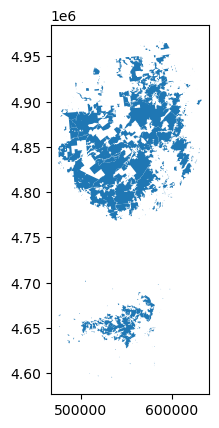

In [7]:
wild_lands.plot();

Every GeoDataFrame contains a special "geometry" column. It contains all of the geometric objects that are displayed when we call the plot() method.

In [8]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

While this column can contain a variety of different datatypes, each entry will typically be a **Point**, **LineString**, or **Polygon**.
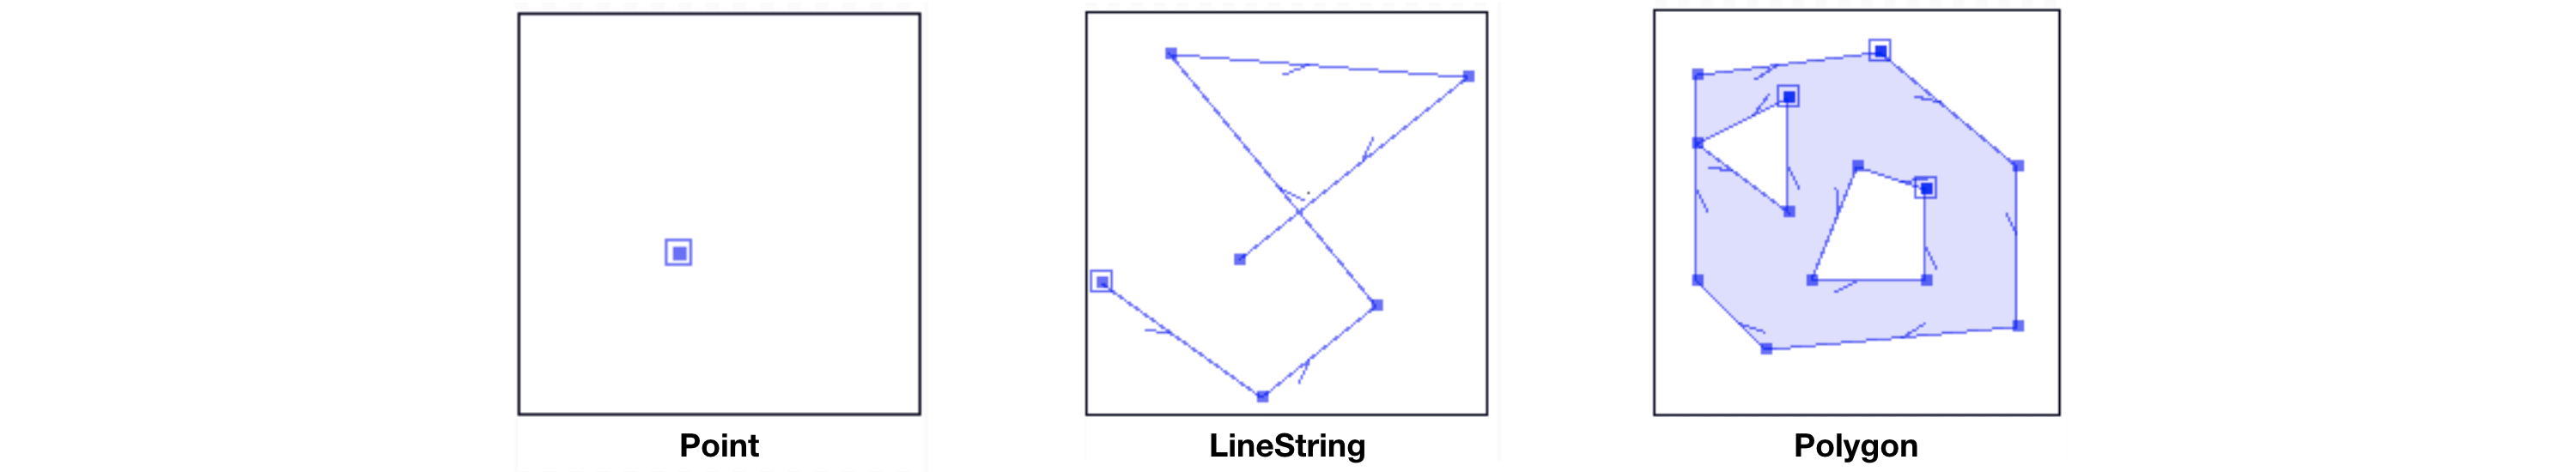

The "geometry" column in our dataset contains 2983 different Polygon objects, each corresponding to a different shape in the plot above.

In the code cell below, we create three more GeoDataFrames, containing campsite locations (Point), foot trails (LineString), and county boundaries (Polygon).

In [9]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("dataset/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("dataset/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("dataset/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

Next, we create a map from all four GeoDataFrames.

The plot() method takes as (optional) input several parameters that can be used to customize the appearance. Most importantly, setting a value for ax ensures that all of the information is plotted on the same map.

<Axes: >

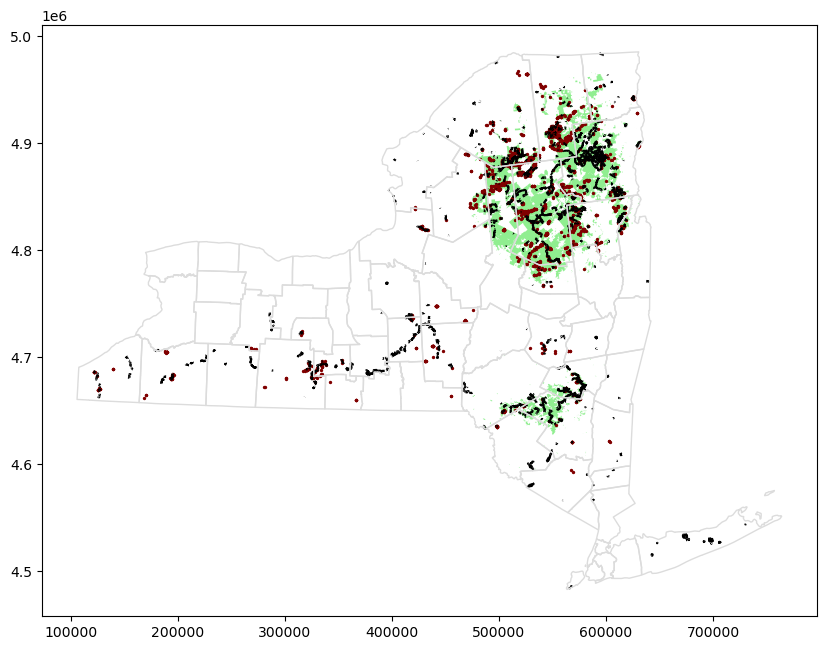

In [10]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

It looks like the northeastern part of the state would be a great option for a camping trip!

## Your turn

This feels complex at first, but you've already learned enough to do important analysis. See for yourself as you identify remote areas of the Philippines where a non-profit can expand its operations.

# Introduction

[Kiva.org](https://www.kiva.org/) is an online crowdfunding platform extending financial services to poor people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

<center>
<img src="https://i.imgur.com/2G8C53X.png" width="500"><br/>
</center>

Kiva reaches some of the most remote places in the world through their global network of "Field Partners". These partners are local organizations working in communities to vet borrowers, provide services, and administer loans.

In this exercise, you'll investigate Kiva loans in the Philippines.  Can you identify regions that might be outside of Kiva's current network, in order to identify opportunities for recruiting new Field Partners?

To get started, run the code cell below to set up our feedback system.

In [13]:
import geopandas as gpd

### 1. Get the data.

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame `world_loans`.  

In [16]:
loans_filepath = "dataset/kiva_loans/kiva_loans/kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

# Uncomment to view the first five rows of the data
world_loans.head()

Partner ID                       Field Part                       sector  \
0           9  KREDIT Microfinance Institution  General Financial Inclusion   
1           9  KREDIT Microfinance Institution  General Financial Inclusion   
2           9  KREDIT Microfinance Institution  General Financial Inclusion   
3           9  KREDIT Microfinance Institution  General Financial Inclusion   
4           9  KREDIT Microfinance Institution  General Financial Inclusion   

               Loan Theme   country  amount                    geometry  
0        Higher Education  Cambodia     450  POINT (102.89751 13.66726)  
1  Vulnerable Populations  Cambodia   20275  POINT (102.98962 13.02870)  
2        Higher Education  Cambodia    9150  POINT (102.98962 13.02870)  
3  Vulnerable Populations  Cambodia  604950  POINT (105.31312 12.09829)  
4              Sanitation  Cambodia     275  POINT (105.31312 12.09829)

### 2. Plot the data.

Run the next code cell without changes to load a GeoDataFrame `world` containing country boundaries.

In [18]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

C:\Users\Akmal Hasan\AppData\Local\Temp\ipykernel_2248\3126548565.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

Use the `world` and `world_loans` GeoDataFrames to visualize Kiva loan locations across the world.


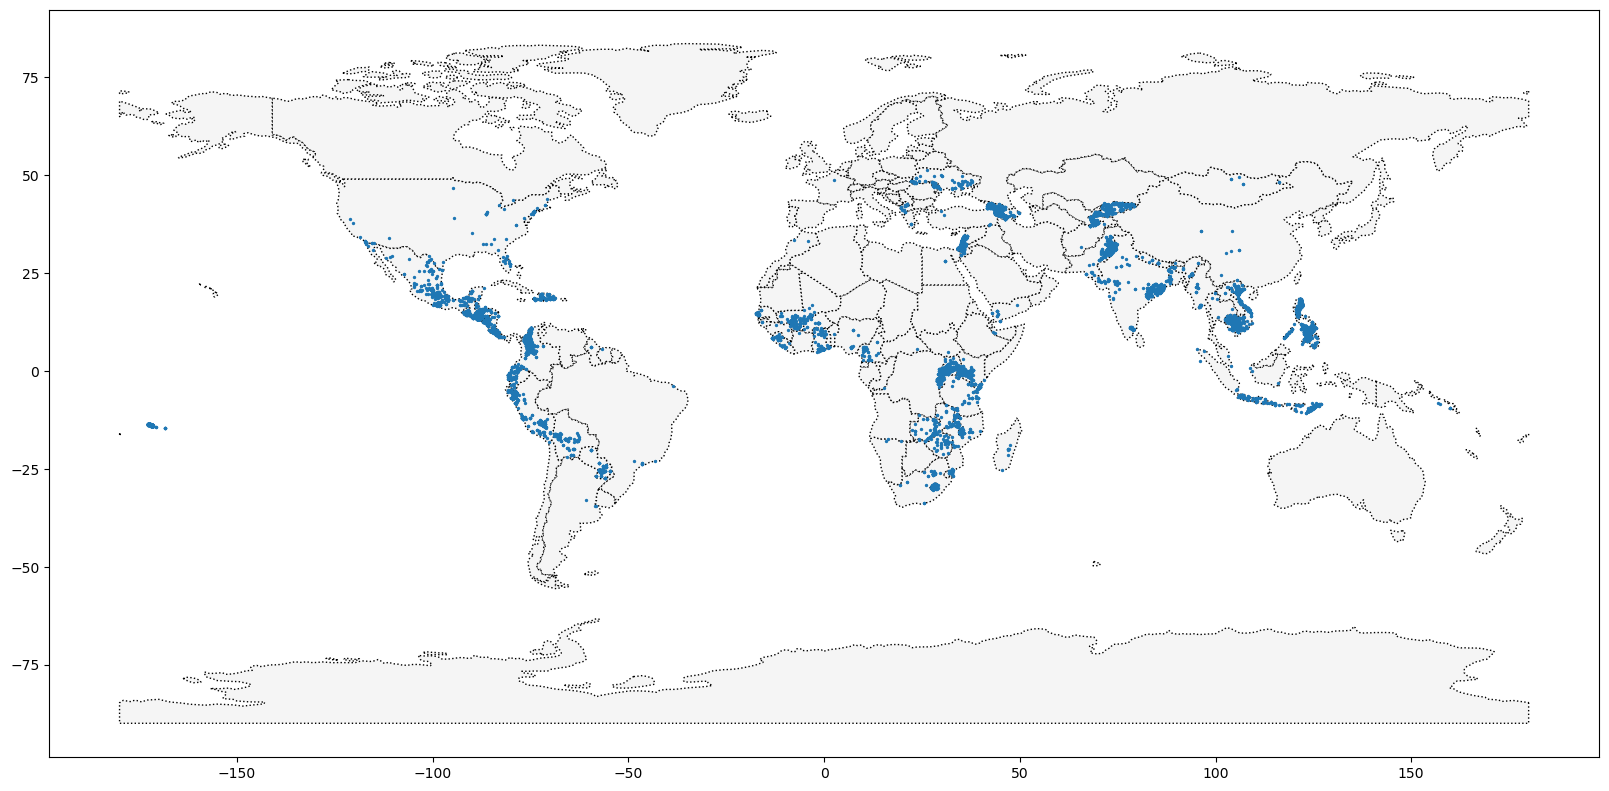

In [20]:
# Your code here
ax = world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=2);

### 3. Select loans based in the Philippines.

Next, you'll focus on loans that are based in the Philippines.  Use the next code cell to create a GeoDataFrame `PHL_loans` which contains all rows from `world_loans` with loans that are based in the Philippines.

In [22]:
# Your code here
PHL_loans = world_loans.loc[world_loans.country=='Philippines']
PHL_loans.head()

Partner ID                  Field Part                       sector  \
2859         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   
2860         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   
2861         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   
2862         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   
2863         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   

     Loan Theme      country  amount                    geometry  
2859    General  Philippines     400  POINT (121.73961 17.64228)  
2860    General  Philippines     400  POINT (121.74169 17.63235)  
2861    General  Philippines     400  POINT (121.46667 16.60000)  
2862    General  Philippines    6050  POINT (121.73333 17.83333)  
2863    General  Philippines     625  POINT (121.51800 16.72368)

### 4. Understand loans in the Philippines.

Run the next code cell without changes to load a GeoDataFrame `PHL` containing boundaries for all islands in the Philippines.

In [23]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("dataset/Philippines_AL258.kml", driver='KML')
PHL.head()

Name Description  \
0  Autonomous Region in Muslim Mindanao               
1                          Bicol Region               
2                        Cagayan Valley               
3                            Calabarzon               
4                                Caraga               

                                            geometry  
0  MULTIPOLYGON (((119.46690 4.58718, 119.46653 4...  
1  MULTIPOLYGON (((124.04577 11.57862, 124.04594 ...  
2  MULTIPOLYGON (((122.51581 17.04436, 122.51568 ...  
3  MULTIPOLYGON (((120.49202 14.05403, 120.49201 ...  
4  MULTIPOLYGON (((126.45401 8.24400, 126.45407 8...

Use the `PHL` and `PHL_loans` GeoDataFrames to visualize loans in the Philippines.

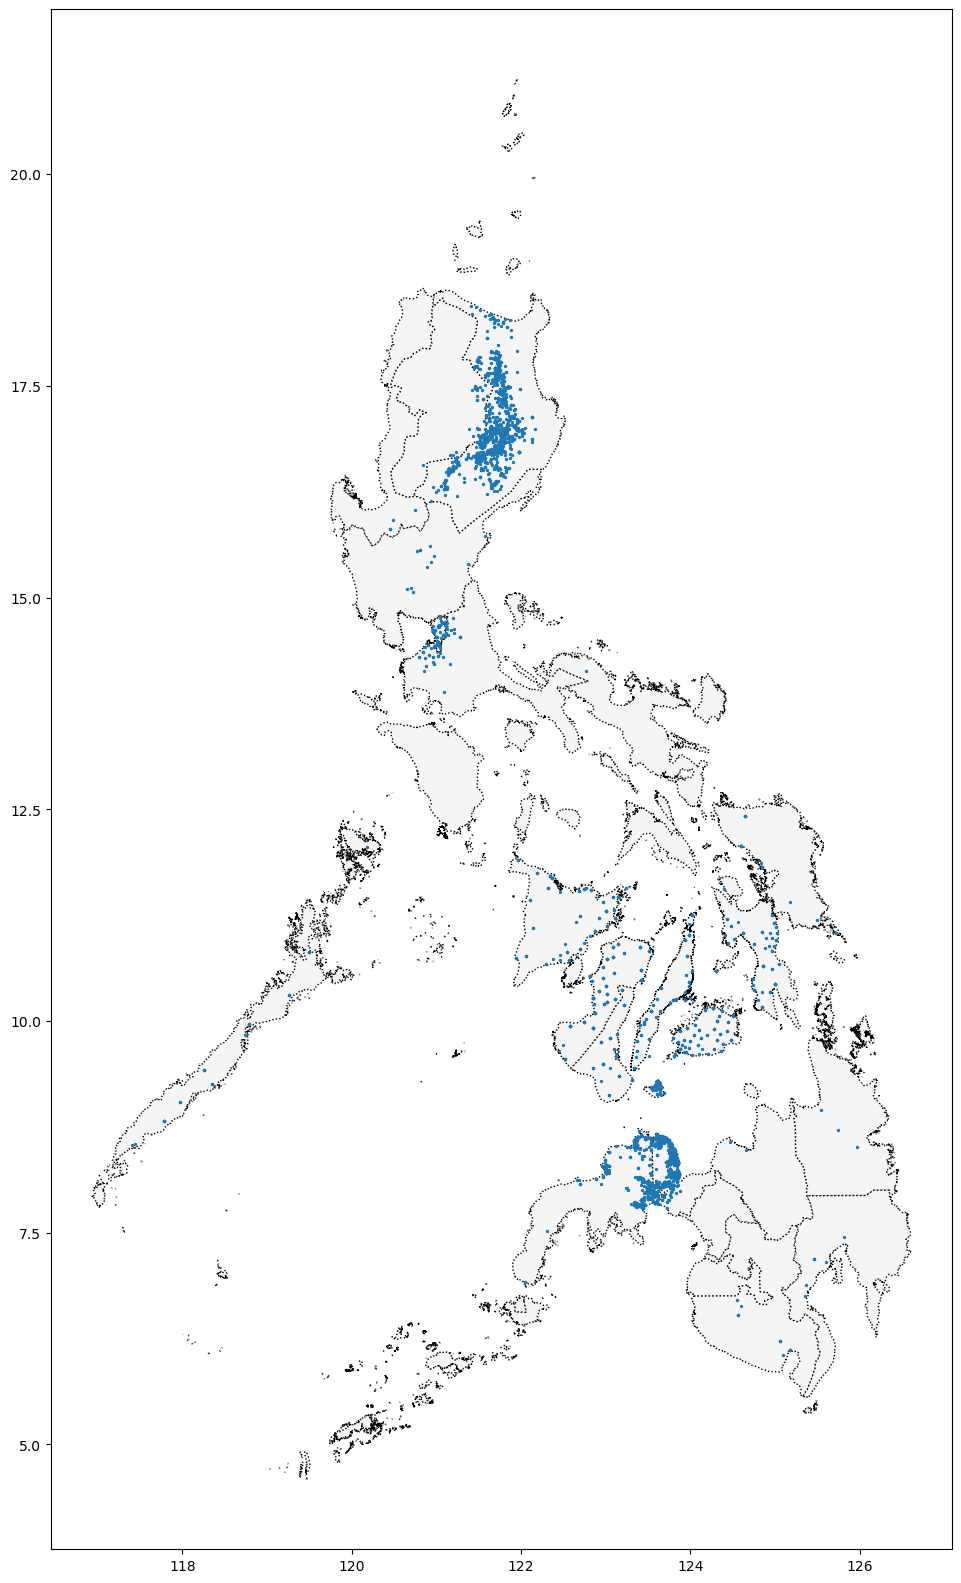

In [25]:
# Your code here
ax = PHL.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
PHL_loans.plot(ax=ax, markersize=2);

# Keep going